In [1]:
%pip install - r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [3]:
data = pd.read_csv('train.csv')


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
data.shape


(103904, 25)

In [6]:
data.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# Check missing values and fill them with mean
data.isnull().sum()


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(
    data['Arrival Delay in Minutes'].mean())


- ## **Exploratory data analysis and visualization**

### **1. Customer types and classes**

In [9]:
# Check customer type and class
print(data['Customer Type'].unique())
print(data['Class'].unique())


['Loyal Customer' 'disloyal Customer']
['Eco Plus' 'Business' 'Eco']


In [10]:
# What class do different types of customers prefer
customer_pref_class = pd.DataFrame(data[['Customer Type', 'Class']].groupby(
    by='Customer Type').value_counts().reset_index().rename(columns={0: 'Num of Customers'}))
customer_pref_class


,Customer Type,Class,Num of Customers
0,Loyal Customer,Business,42309
1,Loyal Customer,Eco,35835
2,Loyal Customer,Eco Plus,6779
3,disloyal Customer,Eco,10910
4,disloyal Customer,Business,7356
5,disloyal Customer,Eco Plus,715


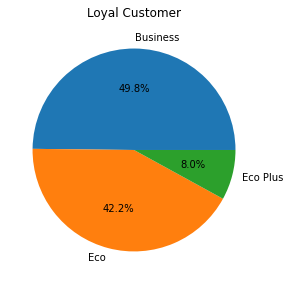

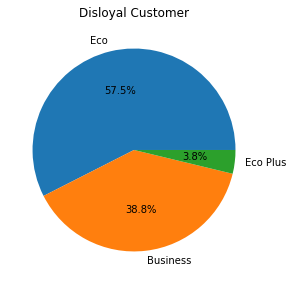

In [11]:
# Plot the result
loyal_customer = customer_pref_class.loc[customer_pref_class['Customer Type']
                                         == 'Loyal Customer']
disloyal_customer = customer_pref_class.loc[customer_pref_class['Customer Type']
                                            == 'disloyal Customer']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(loyal_customer['Num of Customers'],
        labels=loyal_customer['Class'], autopct='%.1f%%')
plt.title("Loyal Customer")

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.pie(disloyal_customer['Num of Customers'],
        labels=disloyal_customer['Class'], autopct='%.1f%%')
plt.title("Disloyal Customer")


plt.show()


### **2. Age and type of travel**

In [12]:
age_travel = pd.DataFrame(data[['Age', 'Type of Travel']].groupby(
    by='Type of Travel').value_counts().reset_index().rename(columns={0: 'Num of Customers'}))
age_travel


,Type of Travel,Age,Num of Customers
0,Business travel,39,2485
1,Business travel,25,2312
2,Business travel,40,2074
3,Business travel,44,1972
4,Business travel,42,1968
...,...,...,...
134,Personal Travel,22,472
135,Personal Travel,46,471
136,Personal Travel,66,465
137,Personal Travel,38,465


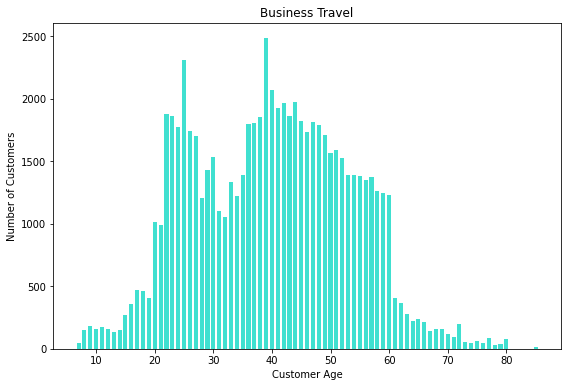

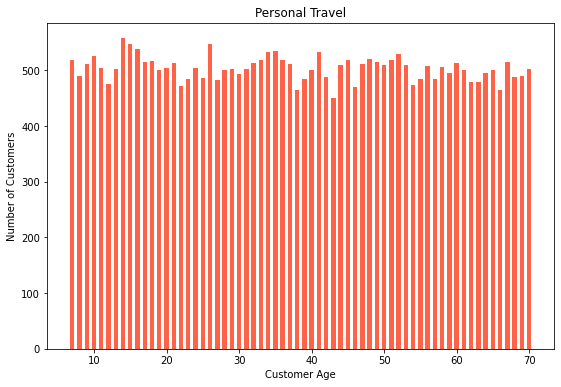

In [13]:
business_travel = age_travel.loc[age_travel['Type of Travel']
                                 == 'Business travel'].sort_values(by='Age', ascending=False)
personal_travel = age_travel.loc[age_travel['Type of Travel']
                                 == 'Personal Travel'].sort_values(by='Age', ascending=False)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(business_travel['Age'], business_travel['Num of Customers'],
        width=0.7, color='turquoise')
plt.title("Business Travel")
plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
plt.bar(personal_travel['Age'],
        personal_travel['Num of Customers'], width=0.6, color='tomato')
plt.title("Personal Travel")
plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')

plt.show()


### **3. Satisfaction analysis**

#### - Age and satisfaction

In [14]:
age_satisfaction = pd.DataFrame(data[['Age', 'satisfaction']].groupby(
    by='satisfaction').value_counts().reset_index().rename(columns={0: 'Number'}))
age_satisfaction


,satisfaction,Age,Number
0,neutral or dissatisfied,25,1868
1,neutral or dissatisfied,26,1561
2,neutral or dissatisfied,36,1494
3,neutral or dissatisfied,27,1459
4,neutral or dissatisfied,37,1438
...,...,...,...
145,satisfied,77,16
146,satisfied,80,15
147,satisfied,79,12
148,satisfied,78,11


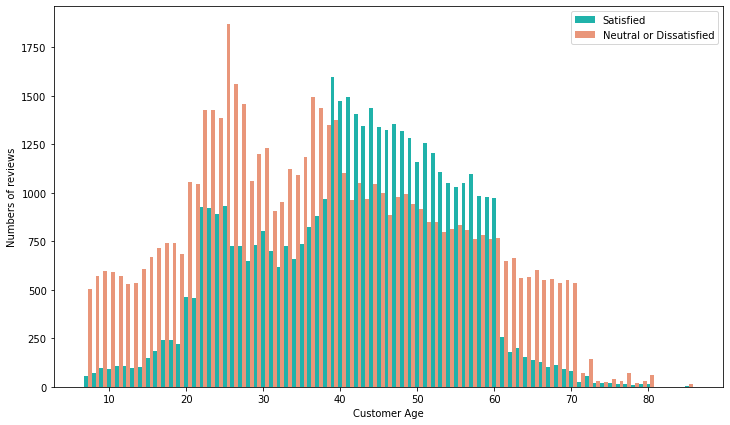

In [15]:
satisfied = age_satisfaction.loc[age_satisfaction['satisfaction']
                                 == 'satisfied'].sort_values(by='Age', ascending=False)
dissatisfied = age_satisfaction.loc[age_satisfaction['satisfaction']
                                    == 'neutral or dissatisfied'].sort_values(by='Age', ascending=False)

plt.figure(figsize=(12, 7))

plt.bar(satisfied['Age'], satisfied['Number'],
        width=0.5, color='lightseagreen')
plt.bar(dissatisfied['Age']+0.5, dissatisfied['Number'],
        width=0.5, color='darksalmon')
plt.xlabel('Customer Age')
plt.ylabel('Numbers of reviews')

plt.legend(['Satisfied', 'Neutral or Dissatisfied'])
plt.show()


#### - Class, flight distance and satisfaction

In [16]:
class_distance_satisfaction = data[[
    'Class', 'Flight Distance', 'satisfaction']]
class_distance_satisfaction


,Class,Flight Distance,satisfaction
0,Eco Plus,460,neutral or dissatisfied
1,Business,235,neutral or dissatisfied
2,Business,1142,satisfied
3,Business,562,neutral or dissatisfied
4,Business,214,satisfied
...,...,...,...
103899,Eco,192,neutral or dissatisfied
103900,Business,2347,satisfied
103901,Business,1995,neutral or dissatisfied
103902,Eco,1000,neutral or dissatisfied


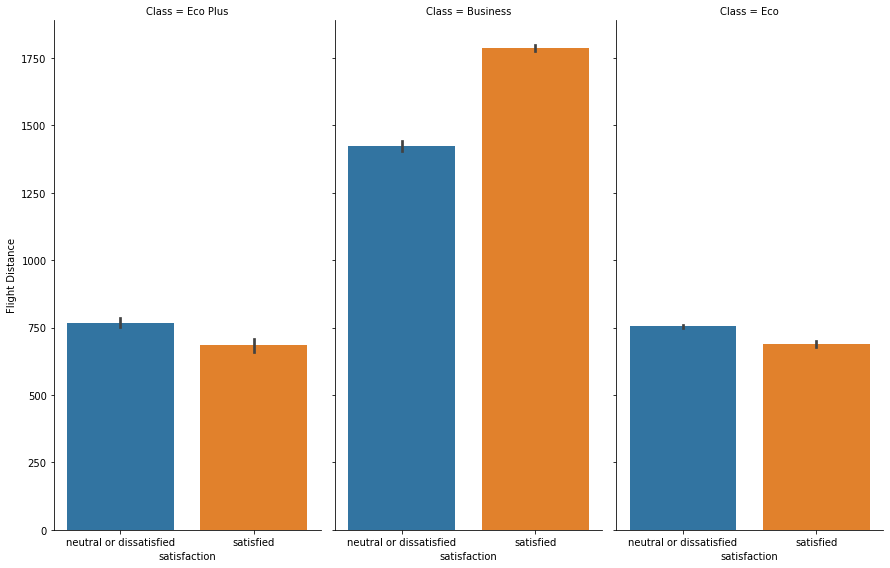

In [17]:
g = sns.catplot(x='satisfaction', y='Flight Distance', col='Class', col_wrap=8,
                data=class_distance_satisfaction,
                kind='bar', height=8, aspect=0.5)


- ## **Model building**

### **1. Encode the categorical variables**

In [18]:
# Drop the unecessary data: unnamed and id columns
train = data.drop(['Unnamed: 0', 'id'], axis=1)

# Encode the categorical variables and get the train/test datasets
cat_list = ['Gender', 'Customer Type',
            'Type of Travel', 'Class', 'satisfaction']
encoders = {}
lookups = {}
for col in cat_list:
    lb = preprocessing.LabelEncoder()
    train[col] = lb.fit_transform(train[col])
    encoders[col] = lb

# Check the original values of each encoder.  Type lookups to check
for col, enc in encoders.items():
    classes = enc.classes_
    lookups[col] = {}
    for val in classes:
        lookups[col][val] = enc.transform([val])

train


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [19]:
# Load test dataset
test = pd.read_csv('test.csv')
test = test.drop(['Unnamed: 0', 'id'], axis=1)


In [20]:
# Check the missing values of test dataset and fill them with mean
test.isnull().sum()
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(
    test['Arrival Delay in Minutes'].mean())


In [21]:
# Encode the categorical variables and get the train/test datasets
cat_list = ['Gender', 'Customer Type',
            'Type of Travel', 'Class', 'satisfaction']
encoders = {}
for col in cat_list:
    lb = preprocessing.LabelEncoder()
    test[col] = lb.fit_transform(test[col])
    encoders[col] = lb

test


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


### **2. Models with all features**

#### Get train and test datasets and normalize the data

In [40]:
# Get train and test data
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
            'Flight Distance', 'Inflight wifi service',
            'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service',
            'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

X_train = train[features]
X_test = test[features].to_numpy()
y_train = train[target]
y_test = test[target].to_numpy()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#### Logistic regression

In [104]:
lr = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['saga', 'lbfgs', 'liblinear']}
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
clf = GridSearchCV(lr, param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 30 candidates, totalling 540 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear']},
             verbose=1)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8713427779488759
F1 Score: 0.8500941957477347


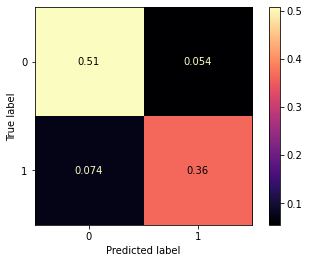

In [105]:
print('Best parameters:', clf.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(
    clf, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### K Neighbors Classifier

In [106]:
# model with gridsearch
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': list(range(1, 10)),
                  'p': [1, 2],
                  'weights': ('uniform', 'distance'),
                  'metric': ('minkowski', 'euclidean', 'chebyshev')}
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gsk = GridSearchCV(knn, param_grid=param_grid_knn, cv=cv, verbose=1, n_jobs=-1)
gsk.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 108 candidates, totalling 1944 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'euclidean', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2], 'weights': ('uniform', 'distance')},
             verbose=1)

Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9384431783184478
F1 Score: 0.9284275547200215


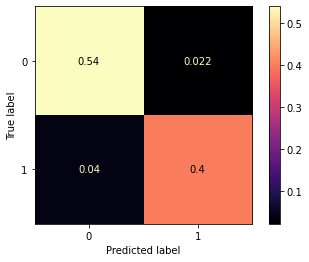

In [107]:
print('Best parameters:', gsk.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gsk.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gsk.predict(X_test)))
metrics.plot_confusion_matrix(
    gsk, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### Decision Tree Classifier

In [115]:
tree = DecisionTreeClassifier()
param_grid_tree = {'criterion': ('gini', 'entropy', 'log_loss'),
                   'max_depth': list(range(1, 10)),
                   'min_samples_split': list(range(1, 10)),
                   'max_features': ('sqrt', 'log2'), }
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gst = GridSearchCV(tree, param_grid=param_grid_tree,
                   cv=cv, verbose=1, n_jobs=-1)
gst.fit(X_train, y_train)


Fitting 18 folds for each of 486 candidates, totalling 8748 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 6}
Accuracy: 0.9104943024330151
F1 Score: 0.8975725802898806


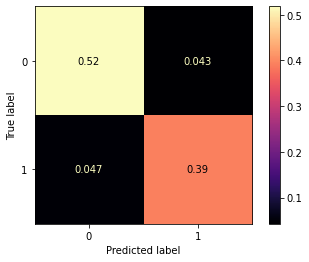

In [116]:
print('Best parameters:', gst.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gst.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gst.predict(X_test)))
metrics.plot_confusion_matrix(
    gst, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### Random Forest Classifier

In [121]:
forest = RandomForestClassifier()
param_grid_forest = {'criterion': ['gini', 'entropy'],
                     'n_estimators': [10, 100, 1000],
                     'max_features': ('sqrt', 'log2'), }
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gsf = GridSearchCV(forest, param_grid=param_grid_forest,
                   cv=cv, verbose=1, n_jobs=-1)
gsf.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 12 candidates, totalling 216 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

Best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
Accuracy: 0.9636972590083154
F1 Score: 0.9579487179487179


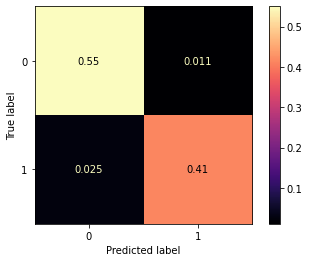

In [123]:
print('Best parameters:', gsf.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gsf.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gsf.predict(X_test)))
metrics.plot_confusion_matrix(
    gsf, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### XGBoost Classifier

In [31]:
boost = GradientBoostingClassifier()
param_grid_boost = {'learning_rate': [0.01, 0.05, 0.1],
                    'subsample': [0.5, 0.75, 1],
                    'n_estimators': [100, 500],
                    'max_depth': [2, 4, 6],
                    'max_features': ['sqrt', 'log2']}
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gsb = GridSearchCV(boost, param_grid=param_grid_boost,
                   cv=cv, verbose=1, n_jobs=-1)
gsb.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 108 candidates, totalling 1944 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500],
                         'subsample': [0.5, 0.75, 1]},
             verbose=1)

Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500, 'subsample': 1}
Accuracy: 0.963658761934093
F1 Score: 0.9580519018841095


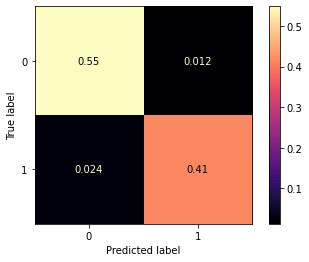

In [32]:
print('Best parameters:', gsb.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gsb.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gsb.predict(X_test)))
metrics.plot_confusion_matrix(
    gsb, X_test, y_test, cmap=plt.cm.magma, normalize='all')


Based on the trained models above, we can see that random forest and gradient boost models work the best with similar accuracy 96.3% and F1 score 95.8%.
Since the F1 score of gradient boost model is slightly higer than random forest, we will explore the feature importance using either  gradient boost or random forest.

### **3. Models with feature selection**

#### Correlation map check


<AxesSubplot:>

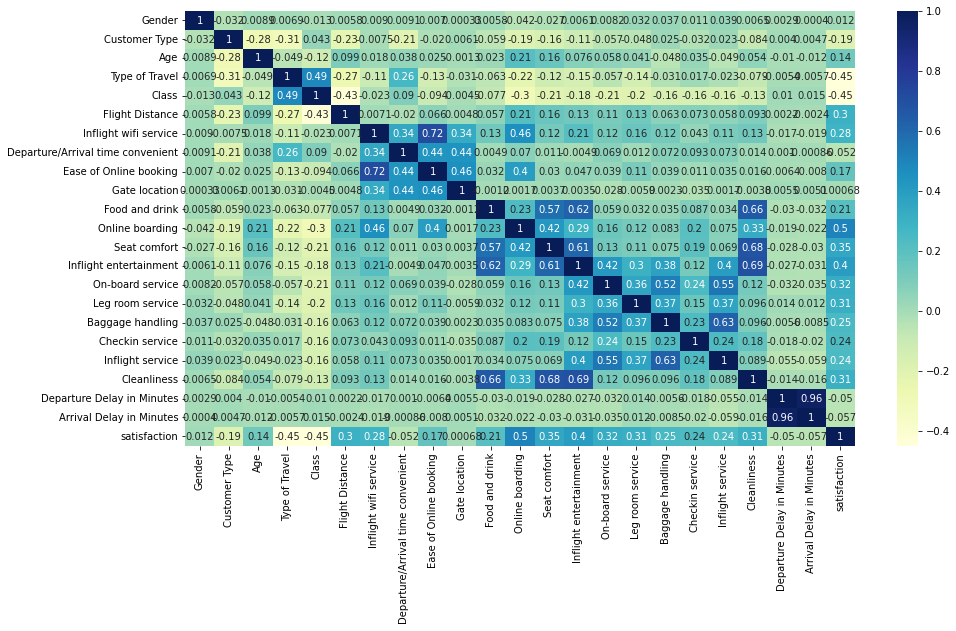

In [150]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")


In [65]:
X_fs_train = scaler.fit_transform(train[features])
y_fs_train = train[target]
X_fs_test = scaler.fit_transform(test[features])
y_fs_test = test[target]


#### Feature importance

In [66]:
selector = SelectFromModel(RandomForestClassifier())
selector.fit(X_fs_train, y_fs_train)
support = selector.get_support()
features = train[features].loc[:].columns.tolist()
print(features)
print(RandomForestClassifier().fit(
    X_fs_train, y_fs_train).feature_importances_)


['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
[0.0043576  0.03717216 0.03131339 0.10141703 0.09936123 0.0354032
 0.14107691 0.01689228 0.03588653 0.01599439 0.01128513 0.18121503
 0.04985347 0.05221288 0.03172188 0.03504612 0.02438742 0.0237451
 0.02312899 0.02507641 0.01116449 0.01228835]


#### Feature permutation importance

In [67]:
model = RandomForestClassifier()
model.fit(X_fs_train, y_fs_train)
perm = PermutationImportance(model, random_state=1).fit(X_fs_test, y_fs_test)
eli5.show_weights(perm, feature_names=test[features].columns.tolist())


Weight,Feature
0.1389 ± 0.0023,Inflight wifi service
0.1336 ± 0.0024,Type of Travel
0.0513 ± 0.0016,Customer Type
0.0328 ± 0.0010,Online boarding
0.0237 ± 0.0018,Checkin service
0.0218 ± 0.0014,Class
0.0188 ± 0.0014,Baggage handling
0.0180 ± 0.0019,Inflight service
0.0169 ± 0.0007,Seat comfort
0.0156 ± 0.0005,Cleanliness


In [ ]:
# Based on the above feature selection, we can select the most important features which are:
# 'Inflight wifi service', 'Type of Travel', 'Customer Type', 'Online boarding', 'Checkin service', 'Class', 'Baggage handling', 'Seat comfort', 'Inflight service', 'Cleanliness', 'On-board service', 'Leg room service', 'Inflight entertainment'


In [38]:
# Get train and test data based on the feature selection
features = ['Inflight wifi service', 'Type of Travel', 'Customer Type', 'Online boarding', 'Checkin service', 'Class', 
            'Baggage handling', 'Seat comfort', 'Inflight service', 'Cleanliness', 'On-board service', 'Leg room service', 
            'Inflight entertainment']
target = ['satisfaction']

X_train = train[features]
X_test = test[features].to_numpy()
y_train = train[target]
y_test = test[target].to_numpy()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#### Logistic Regression

In [162]:
lr = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['saga', 'lbfgs', 'liblinear']}
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
clf = GridSearchCV(lr, param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 30 candidates, totalling 540 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear']},
             verbose=1)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8671080997844164
F1 Score: 0.8454789615040286


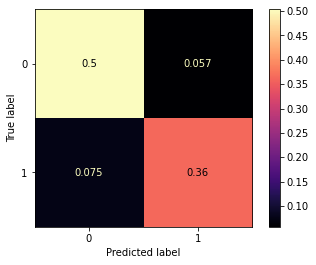

In [163]:
print('Best parameters:', clf.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(
    clf, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### K Neighbours Classifier

In [164]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': list(range(1, 10)),
                  'p': [1, 2],
                  'weights': ('uniform', 'distance'),
                  'metric': ('minkowski', 'euclidean', 'chebyshev')}
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gsk = GridSearchCV(knn, param_grid=param_grid_knn, cv=cv, verbose=1, n_jobs=-1)
gsk.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 108 candidates, totalling 1944 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'euclidean', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2], 'weights': ('uniform', 'distance')},
             verbose=1)

Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9380197105020018
F1 Score: 0.9271690943635212


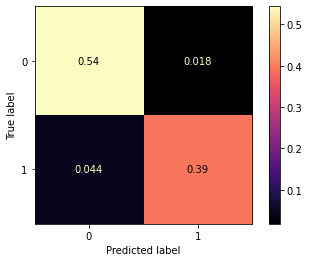

In [165]:
print('Best parameters:', gsk.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gsk.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gsk.predict(X_test)))
metrics.plot_confusion_matrix(
    gsk, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### Decision Tree Classifier

In [166]:
tree = DecisionTreeClassifier()
param_grid_tree = {'criterion': ('gini', 'entropy', 'log_loss'),
                   'max_depth': list(range(1, 10)),
                   'min_samples_split': list(range(1, 10)),
                   'max_features': ('sqrt', 'log2'), }
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gst = GridSearchCV(tree, param_grid=param_grid_tree,
                   cv=cv, verbose=1, n_jobs=-1)
gst.fit(X_train, y_train)


Fitting 18 folds for each of 486 candidates, totalling 8748 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 7}
Accuracy: 0.922389898367724
F1 Score: 0.9100080349968752


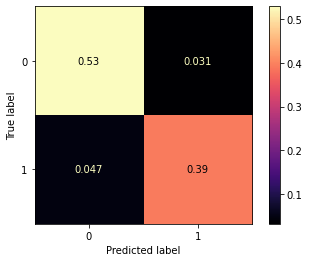

In [167]:
print('Best parameters:', gst.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gst.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gst.predict(X_test)))
metrics.plot_confusion_matrix(
    gst, X_test, y_test, cmap=plt.cm.magma, normalize='all')


#### Random Forest Classifier

In [168]:
forest = RandomForestClassifier()
param_grid_forest = {'criterion': ['gini', 'entropy'],
                     'n_estimators': [10, 100, 1000],
                     'max_features': ('sqrt', 'log2'), }
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
gsf = GridSearchCV(forest, param_grid=param_grid_forest,
                   cv=cv, verbose=1, n_jobs=-1)
gsf.fit(X_train, y_train.values.ravel())


Fitting 18 folds for each of 12 candidates, totalling 216 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

Best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
Accuracy: 0.9570372651678473
F1 Score: 0.9504968062455642


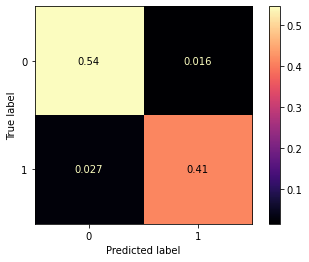

In [169]:
print('Best parameters:', gsf.best_params_)
print('Accuracy:', metrics.accuracy_score(y_test, gsf.predict(X_test)))
print('F1 Score:', metrics.f1_score(y_test, gsf.predict(X_test)))
metrics.plot_confusion_matrix(
    gsf, X_test, y_test, cmap=plt.cm.magma, normalize='all')


Compared to the models without feature selection, this set of models all have lower accuracy and F1 score. We can conclude that for this particular dataset, Random Forest CLassifier has achived the highest score without feature selection at 96.4%.

In [ ]:
# Future Plan
# Get more insights about:
# 1.Parameter selection during grid search
# 2.Feature selection and learn more about how to rank the feature according to the importance more convincingly
